# ESCA 1vsAll Volcano Plots
Andrew E. Davidson  
aedavids@ucsc.edu  
5/1/24

Copyright (c) 2020-2023, Regents of the University of California All rights reserved. https://polyformproject.org/licenses/noncommercial/1.0.0

ref: extraCellularRNA/terra/jupyterNotebooks/cibersort/volcanoPlots.ipynb

Volcano plots of GTEx_TCGA  ESCA 1 vs. all results

default fonts where missing on mustard
```
did not work!!!! see email
conda install -c conda-forge matplotlib-fontconfig
conda install -c conda-forge font-awesome
rm ~/.cache/
```

In [1]:
import ipynbname
from IPython.display import display
from IPython.display import Image
import numpy as np
import pathlib as pl
import pandas as pd
import os
import sys

notebookName = ipynbname.name()
notebookPath = ipynbname.path()
notebookDir = os.path.dirname(notebookPath)

outDir = f'{notebookDir}/{notebookName}.out'
os.makedirs(outDir, exist_ok=True)
print(f'outDir:\n{outDir}')

imgOut = f'{outDir}/img'
os.makedirs(imgOut, exist_ok=True)
print(f'\nimgOut :\n{imgOut}')

outDir:
/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out

imgOut :
/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img


/data/tmp/ipykernel_2149438/625474849.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# setting the python path allows us to run python scripts from using
# the CLI. 
PYTHONPATH = os.environ['PYTHONPATH']
print("ORIG_PYTHONPATH: {}\n".format(PYTHONPATH))

gitRepoRoot = !git rev-parse --show-toplevel
gitRepoRoot = gitRepoRoot[0]


#
# add deseq modules
#
deseqModules = f'{gitRepoRoot}/terra/deseq/python'
# deseqModules = f'{gitRepoRoot}/terra'
print("deseqModules: {}\n".format(deseqModules))

PYTHONPATH = PYTHONPATH + f':{deseqModules}'
print("PYTHONPATH: {}\n".format(PYTHONPATH))

#
# add deconvolutionAnalysis modules
#
deconvolutionModules = f'{gitRepoRoot}/deconvolutionAnalysis/python'
print("deconvolutionModules: {}\n".format(deconvolutionModules))

PYTHONPATH = PYTHONPATH + f':{deconvolutionModules}'
print("PYTHONPATH: {}\n".format(PYTHONPATH))


#
# to be able to import our local python files we need to set the sys.path
# https://stackoverflow.com/a/50155834
#
sys.path.append( str(deseqModules) )
sys.path.append( str(deconvolutionModules) )
print("\nsys.path:\n{}\n".format(sys.path))

ORIG_PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src

deseqModules: /private/home/aedavids/extraCellularRNA/terra/deseq/python

PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src:/private/home/aedavids/extraCellularRNA/terra/deseq/python

deconvolutionModules: /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/python

PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src:/private/home/aedavids/extraCellularRNA/terra/deseq/python:/private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/python


sys.path:
['/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks', '/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks', '/private/home/aedavids/extraCellularRNA/src', '/private/home/aedavids/miniconda3/envs/extraCellularRNA/lib/python311.zip', '/private/home/aedavids/miniconda3/envs/extraCellularRNA/lib/python3.11', '/private/home/aedavids/miniconda3/envs/extraCellularRNA/lib/python3.11/lib-dynload', '', '/private/ho

In [3]:
#local imports
from analysis.utilities import saveList
from pipeline.dataFactory.utilities import urlify
from plots import volcanoPlots
# from deseq.python.plots import volcanoPlots

In [4]:
# load data
dataRoot = '/private/groups/kimlab/GTEx_TCGA/1vsAll'
deseqResultsFileName = "ESCA_vs_all.results"
deseqResultsFilePath = f'{dataRoot}/{deseqResultsFileName}'
print(deseqResultsFilePath)

/private/groups/kimlab/GTEx_TCGA/1vsAll/ESCA_vs_all.results


In [5]:
%%time

def createVolcanoPlot(deseqResults, 
                      imgFilePath, 
                      numHeaderLines, 
                      plotTitle=None, 
                      geneNamesPath=None,
                      plotNames=True):
    '''
    arguments:
        pythonPath:
            set PYTHONPATH to this value. required to find volcano plot code
        deseqResults:
            example: /private/groups/kimlab/GTEx_TCGA/1vsAll/Kidney_Cortex_vs_all.results
            
        imgFilePath: 
            file path to save image with
            
        numHeaderLines
            integer: number of lines at the top of the results file to skip
            
        plotTitle:
            string: plot title string
            
        geneNamesPath
            file that contains genes we want to color red
            
    returns exit status
    '''

    if geneNamesPath:
        if not plotNames :
            arguments ='''--inputFile {} \\
                            --title '{}' \\
                            --output {}  \\
                            --numHeaderLines {} \\
                            --geneNamesFile {}'''.format(deseqResults, 
                                                       plotTitle, 
                                                       imgFilePath, 
                                                       numHeaderLines, 
                                                       geneNamesPath)
        else :
            arguments ='''--inputFile {} \\
                            --title '{}' \\
                            --output {}  \\
                            --numHeaderLines {} \\
                             --geneNamesFile {} \\
                            --label'''.format(deseqResults, 
                                                       plotTitle, 
                                                       imgFilePath, 
                                                       numHeaderLines,
                                                        geneNamesPath
                                                         )
           
    else :
        arguments ='''--inputFile {} \\
                        --title '{}' \\
                        --output {}  \\
                        --numHeaderLines {}'''.format(deseqResults, 
                                                   plotTitle, 
                                                   imgFilePath, 
                                                   numHeaderLines)
    print("arguments:\n{}".format(arguments))
    
    exitStatus = ! (export PYTHONPATH=$PYTHONPATH; python -m plots.volcanoPlots $arguments)
    print("exit status:{}".format(exitStatus))
    return exitStatus


CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 20.5 µs


aedwip /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll.png
arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/ESCA_vs_all.results \
                        --title 'ESCA_vs_all.results 1vsAll' \
                        --output /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll.png  \
                        --numHeaderLines 8
exit status:['DEBUG cli.args.geneNamesFile:None', '############## AEDWIP plotNames:False']


 plot of all 77k genes


CPU times: user 5.05 ms, sys: 4.97 ms, total: 10 ms
Wall time: 50.6 s


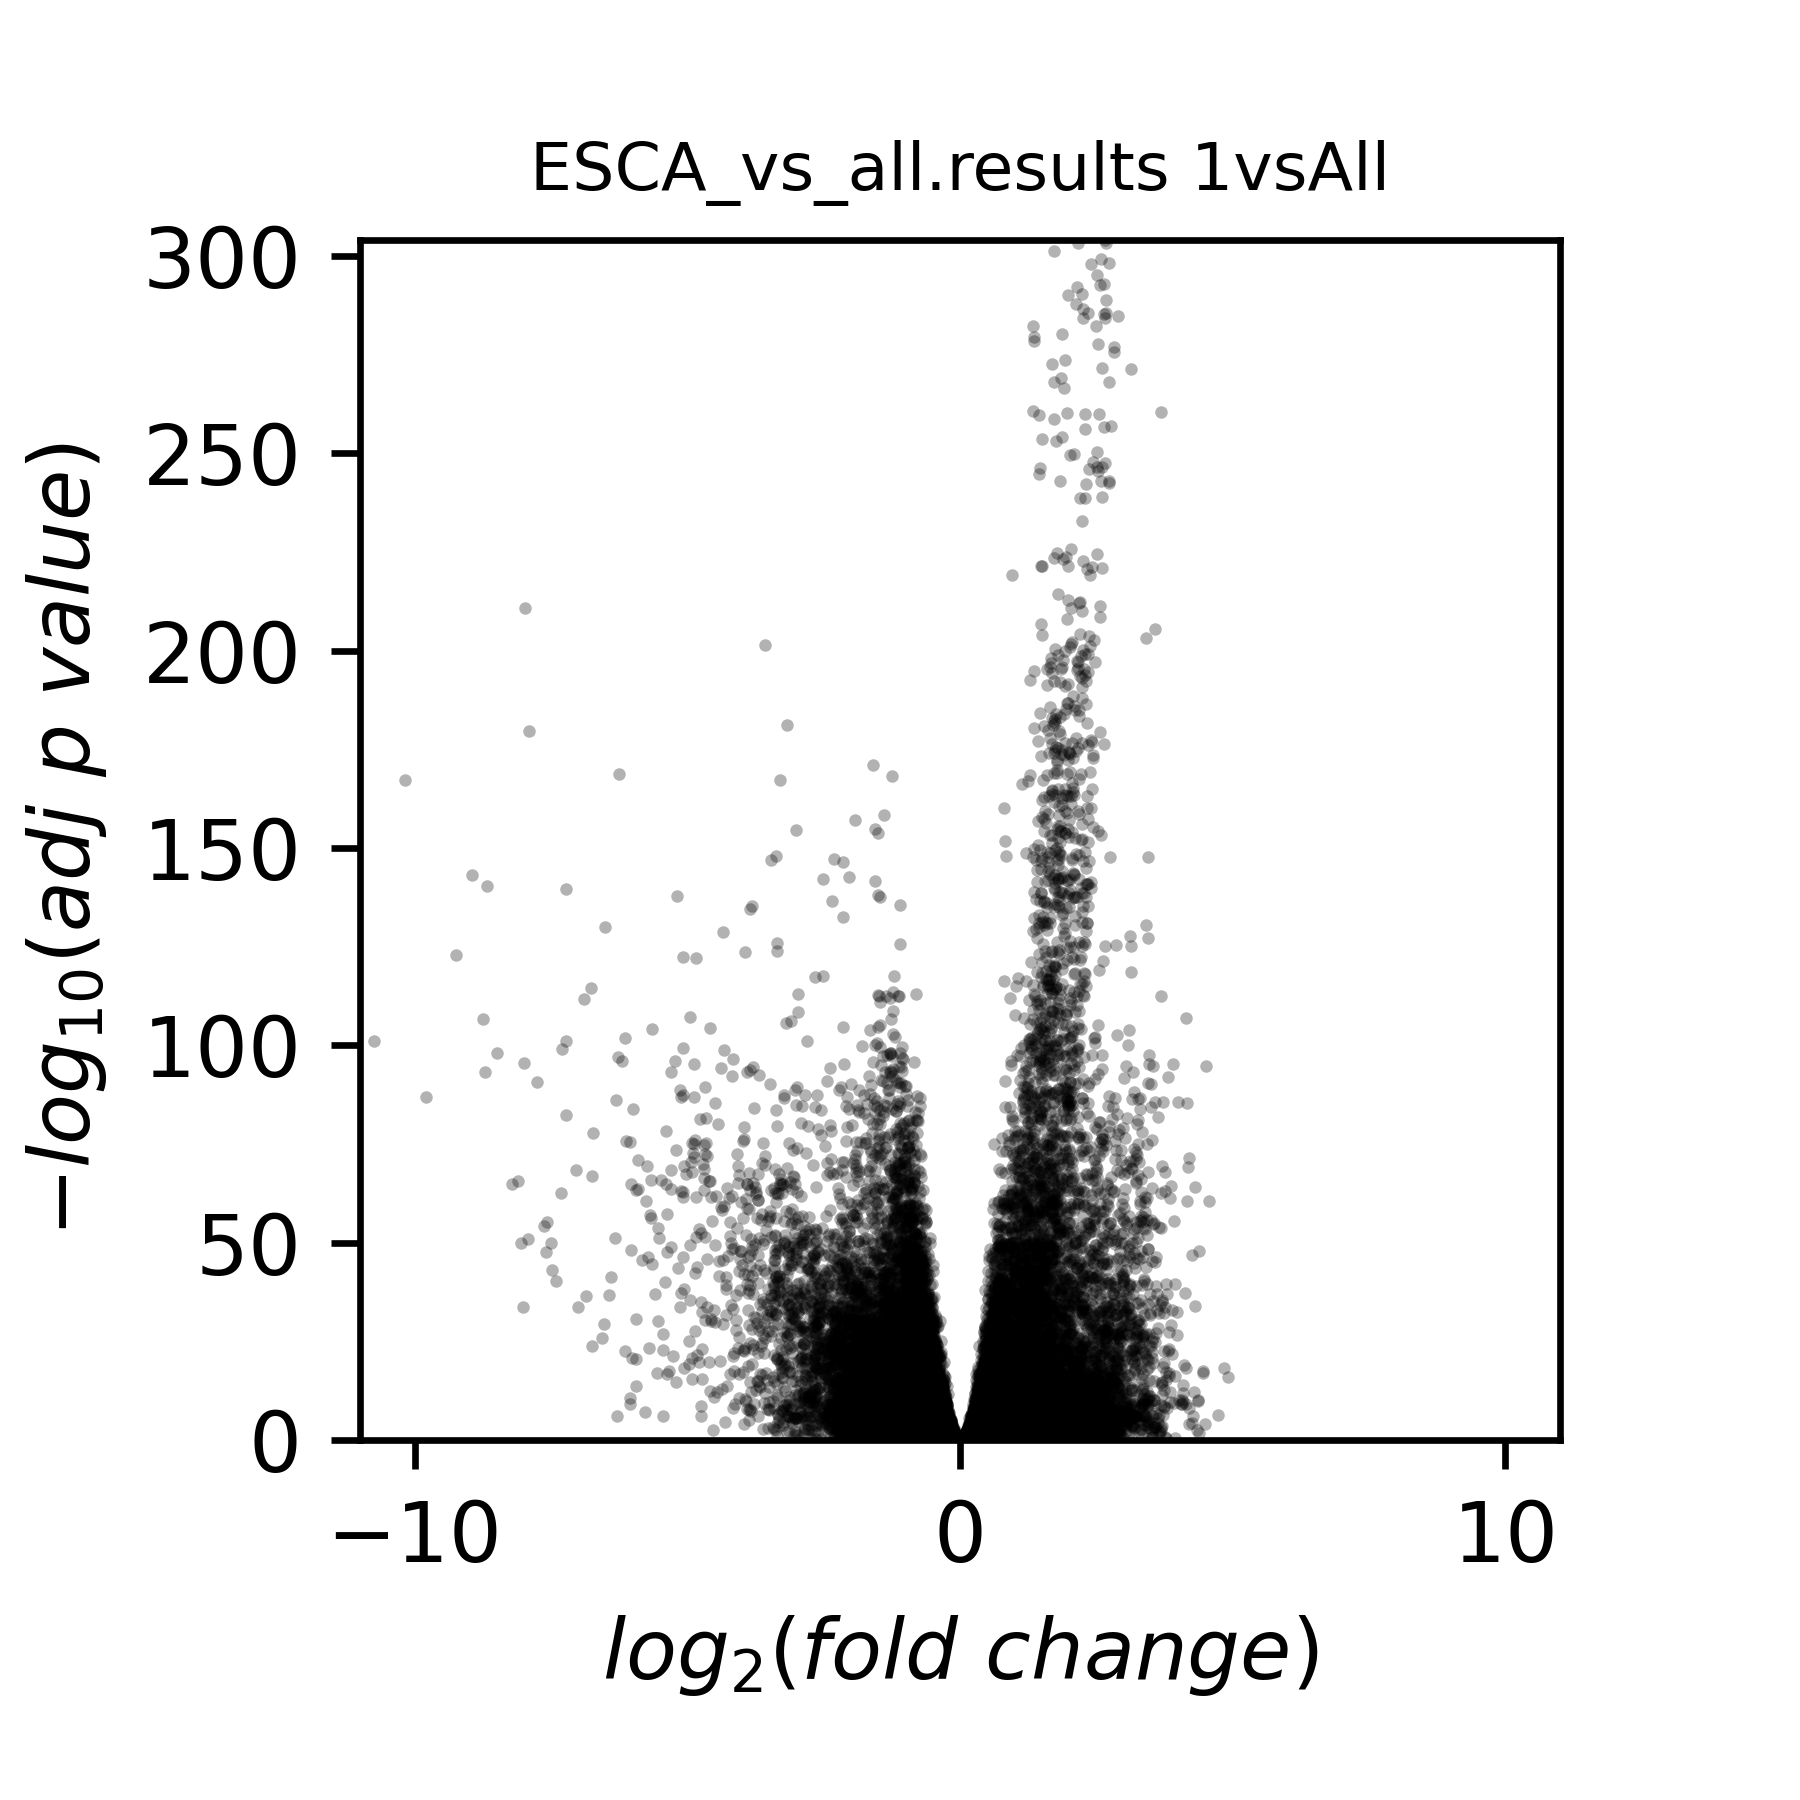

In [6]:
%%time
def plotAllNoColor() -> (str, str) :
    plotTitle = "{} 1vsAll".format(deseqResultsFileName)
    imgFilePath = imgOut +"/" + urlify(plotTitle) + ".png" 
    print(f'aedwip {imgFilePath}')
    numHeaderLines = 8
                    
    # plot
    exitStatus = createVolcanoPlot(deseqResultsFilePath, 
                                   imgFilePath, 
                                   numHeaderLines, 
                                   plotTitle, 
                                   geneNamesPath=None)
    
    
          
    return (exitStatus, imgFilePath)

################################################################################
# generate plot
exitStatus, imgFilePath = plotAllNoColor()

# display
print(f'\n\n plot of all 77k genes\n\n')
Image(imgFilePath)   

# <span style="color:red;background-color:yellow">Color TE's</span>

In [7]:
%%time
# repeatInfoFilePath = '/private/groups/kimlab/GTEx_TCGA/groupbyGeneTrainingSets/named_ucsc.rmsk.insert.info.txt'
repeatInfoFilePath = '/private/groups/kimlab/genomes.annotations/genomes.annotations/gencode.39/named_ucsc.rmsk.insert.info.txt'
print(repeatInfoFilePath)
repeatDF = pd.read_csv(repeatInfoFilePath, sep="\t", index_col='insert')
print(f'repeatDF.shape : {repeatDF.shape}')
repeatDF.iloc[0:5, :]

/private/groups/kimlab/genomes.annotations/genomes.annotations/gencode.39/named_ucsc.rmsk.insert.info.txt
repeatDF.shape : (15625, 2)
CPU times: user 65.4 ms, sys: 37 µs, total: 65.4 ms
Wall time: 63.6 ms


,clade,family
insert,,
(TAACCC)n,Simple_repeat,Simple_repeat
TAR1,Satellite,telo
L1MC5a,LINE,L1
MER5B,DNA,hAT-Charlie
MIR3,SINE,MIR


aedwip /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-TEs.png
len(selectTERows) : 15625 sum : 835 
arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/ESCA_vs_all.results \
                            --title 'ESCA_vs_all.results 1vsAll TEs' \
                            --output /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-TEs.png  \
                            --numHeaderLines 8 \
                            --geneNamesFile /scratch/aedavids/tmp/createTENames.txt
exit status:['DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/createTENames.txt', '############## AEDWIP plotNames:False']


 plot of all 77K genes, TE's are colored. Notice there are not many down regulated genes. This may be due to over ploting


CPU times: user 12.7 ms, sys: 73 µs, total: 12.8 ms
Wall time: 48.2 s


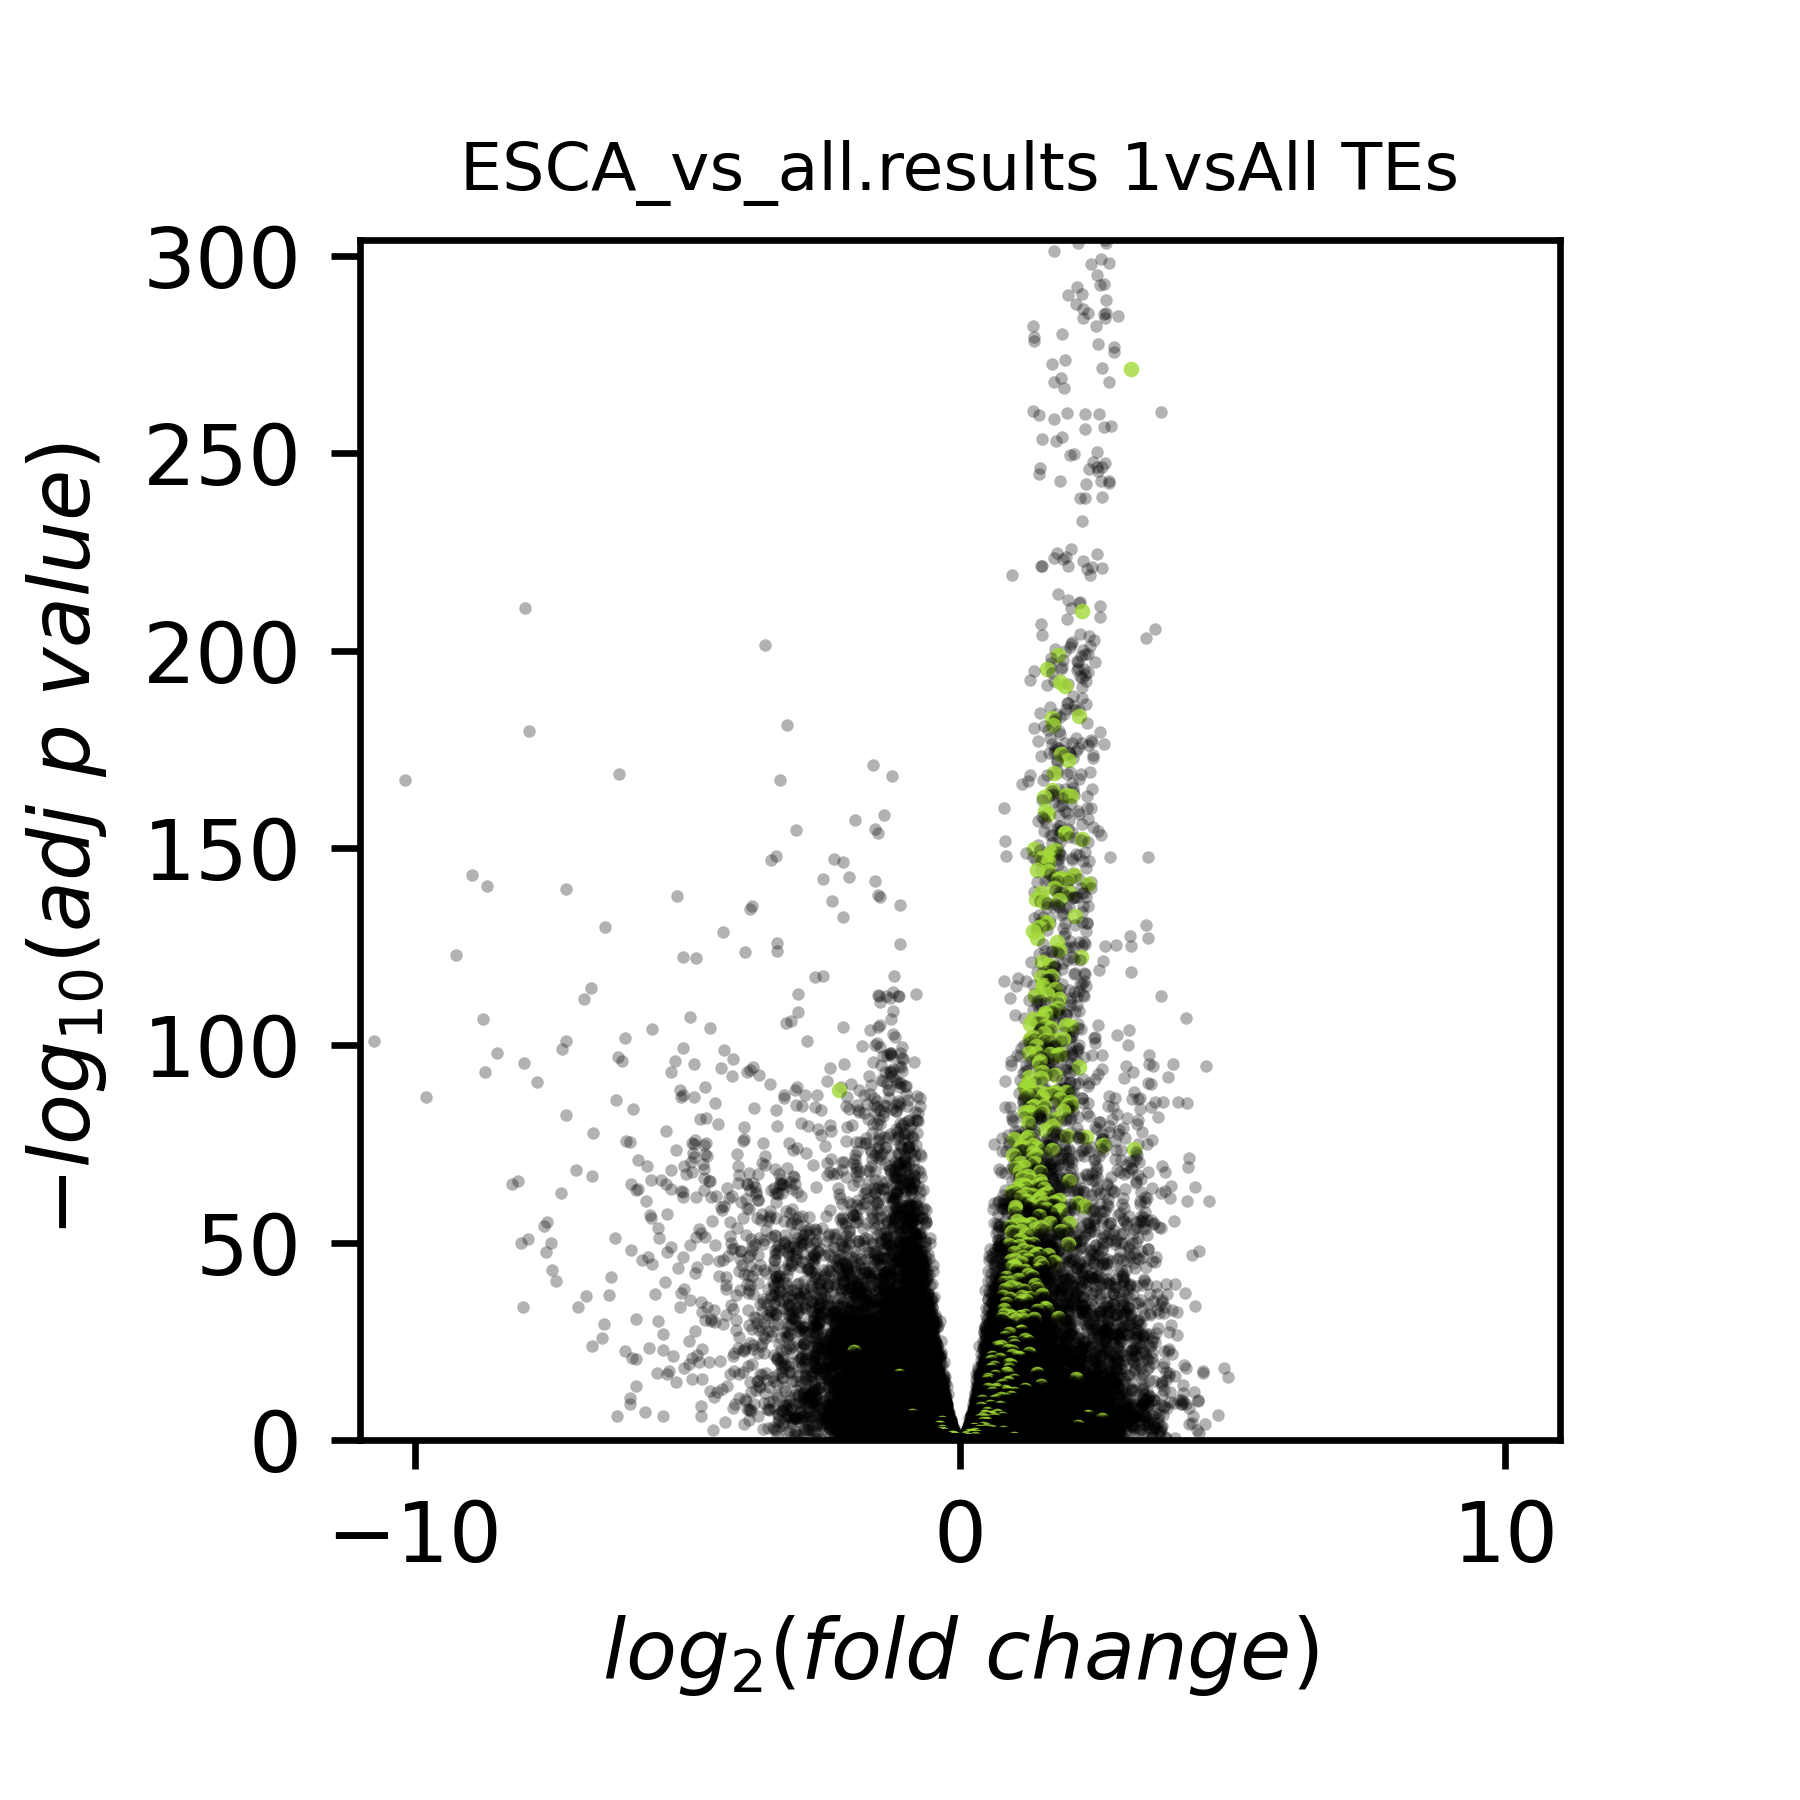

In [8]:
%%time
def createTENames( repeatDF : pd.DataFrame ):
    # get names of TE's we want to color
    TECladeSet = set( ['SINE', 'LINE', 'LTR'] )
    selectTERows = repeatDF.loc[:, 'clade'].isin( TECladeSet )
    print(f'len(selectTERows) : {len(selectTERows)} sum : {selectTERows.sum()} ')
    TE_DF = repeatDF.loc[selectTERows, :]

    # save namesto temp file
    geneNamesPath = f'/scratch/aedavids/tmp/createTENames.txt'
    saveList(geneNamesPath, TE_DF.index.values, isSingleItemLine=True )

    return geneNamesPath
    
def plotTEsNoNames(
    repeatDF : pd.DataFrame
    ):
    plotTitle = "{} 1vsAll TEs".format(deseqResultsFileName)
    imgFilePath = imgOut +"/" + urlify(plotTitle) + ".png" 
    print(f'aedwip {imgFilePath}')
    numHeaderLines = 8

    # # get names of TE's we want to color
    # TECladeSet = set( ['SINE', 'LINE', 'LTR'] )
    # selectTERows = repeatDF.loc[:, 'clade'].isin( TECladeSet )
    # print(f'len(selectTERows) : {len(selectTERows)} sum : {selectTERows.sum()} ')
    # TE_DF = repeatDF.loc[selectTERows, :]

    # # save namesto temp file
    # geneNamesPath = f'/scratch/aedavids/tmp/plotRepeatsGeneNames.txt'
    # saveList(geneNamesPath, TE_DF.index.values, isSingleItemLine=True )

    geneNamesPath = createTENames( repeatDF )
                    
    # plot
    exitStatus = createVolcanoPlot(deseqResultsFilePath, 
                                   imgFilePath, 
                                   numHeaderLines, 
                                   plotTitle, 
                                   geneNamesPath=geneNamesPath,
                                  plotNames=False)
    
    
    return (exitStatus, imgFilePath)
    
      
################################################################################
# generate plot
exitStatus, imgFilePath = plotTEsNoNames(repeatDF)

# display
print(f"\n\n plot of all 77K genes, TE's are colored. Notice there are not many down regulated genes. This may be due to over ploting\n\n")
Image(imgFilePath) 

aedwip /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-named-TEs.png
len(selectTERows) : 15625 sum : 835 
arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/ESCA_vs_all.results \
                            --title 'ESCA_vs_all.results 1vsAll named TEs' \
                            --output /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-named-TEs.png  \
                            --numHeaderLines 8 \
                             --geneNamesFile /scratch/aedavids/tmp/createTENames.txt \
                            --label
exit status:['DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/createTENames.txt', '############## AEDWIP plotNames:True']
CPU times: user 5.11 ms, sys: 5.88 ms, total: 11 ms
Wall time: 54.7 s


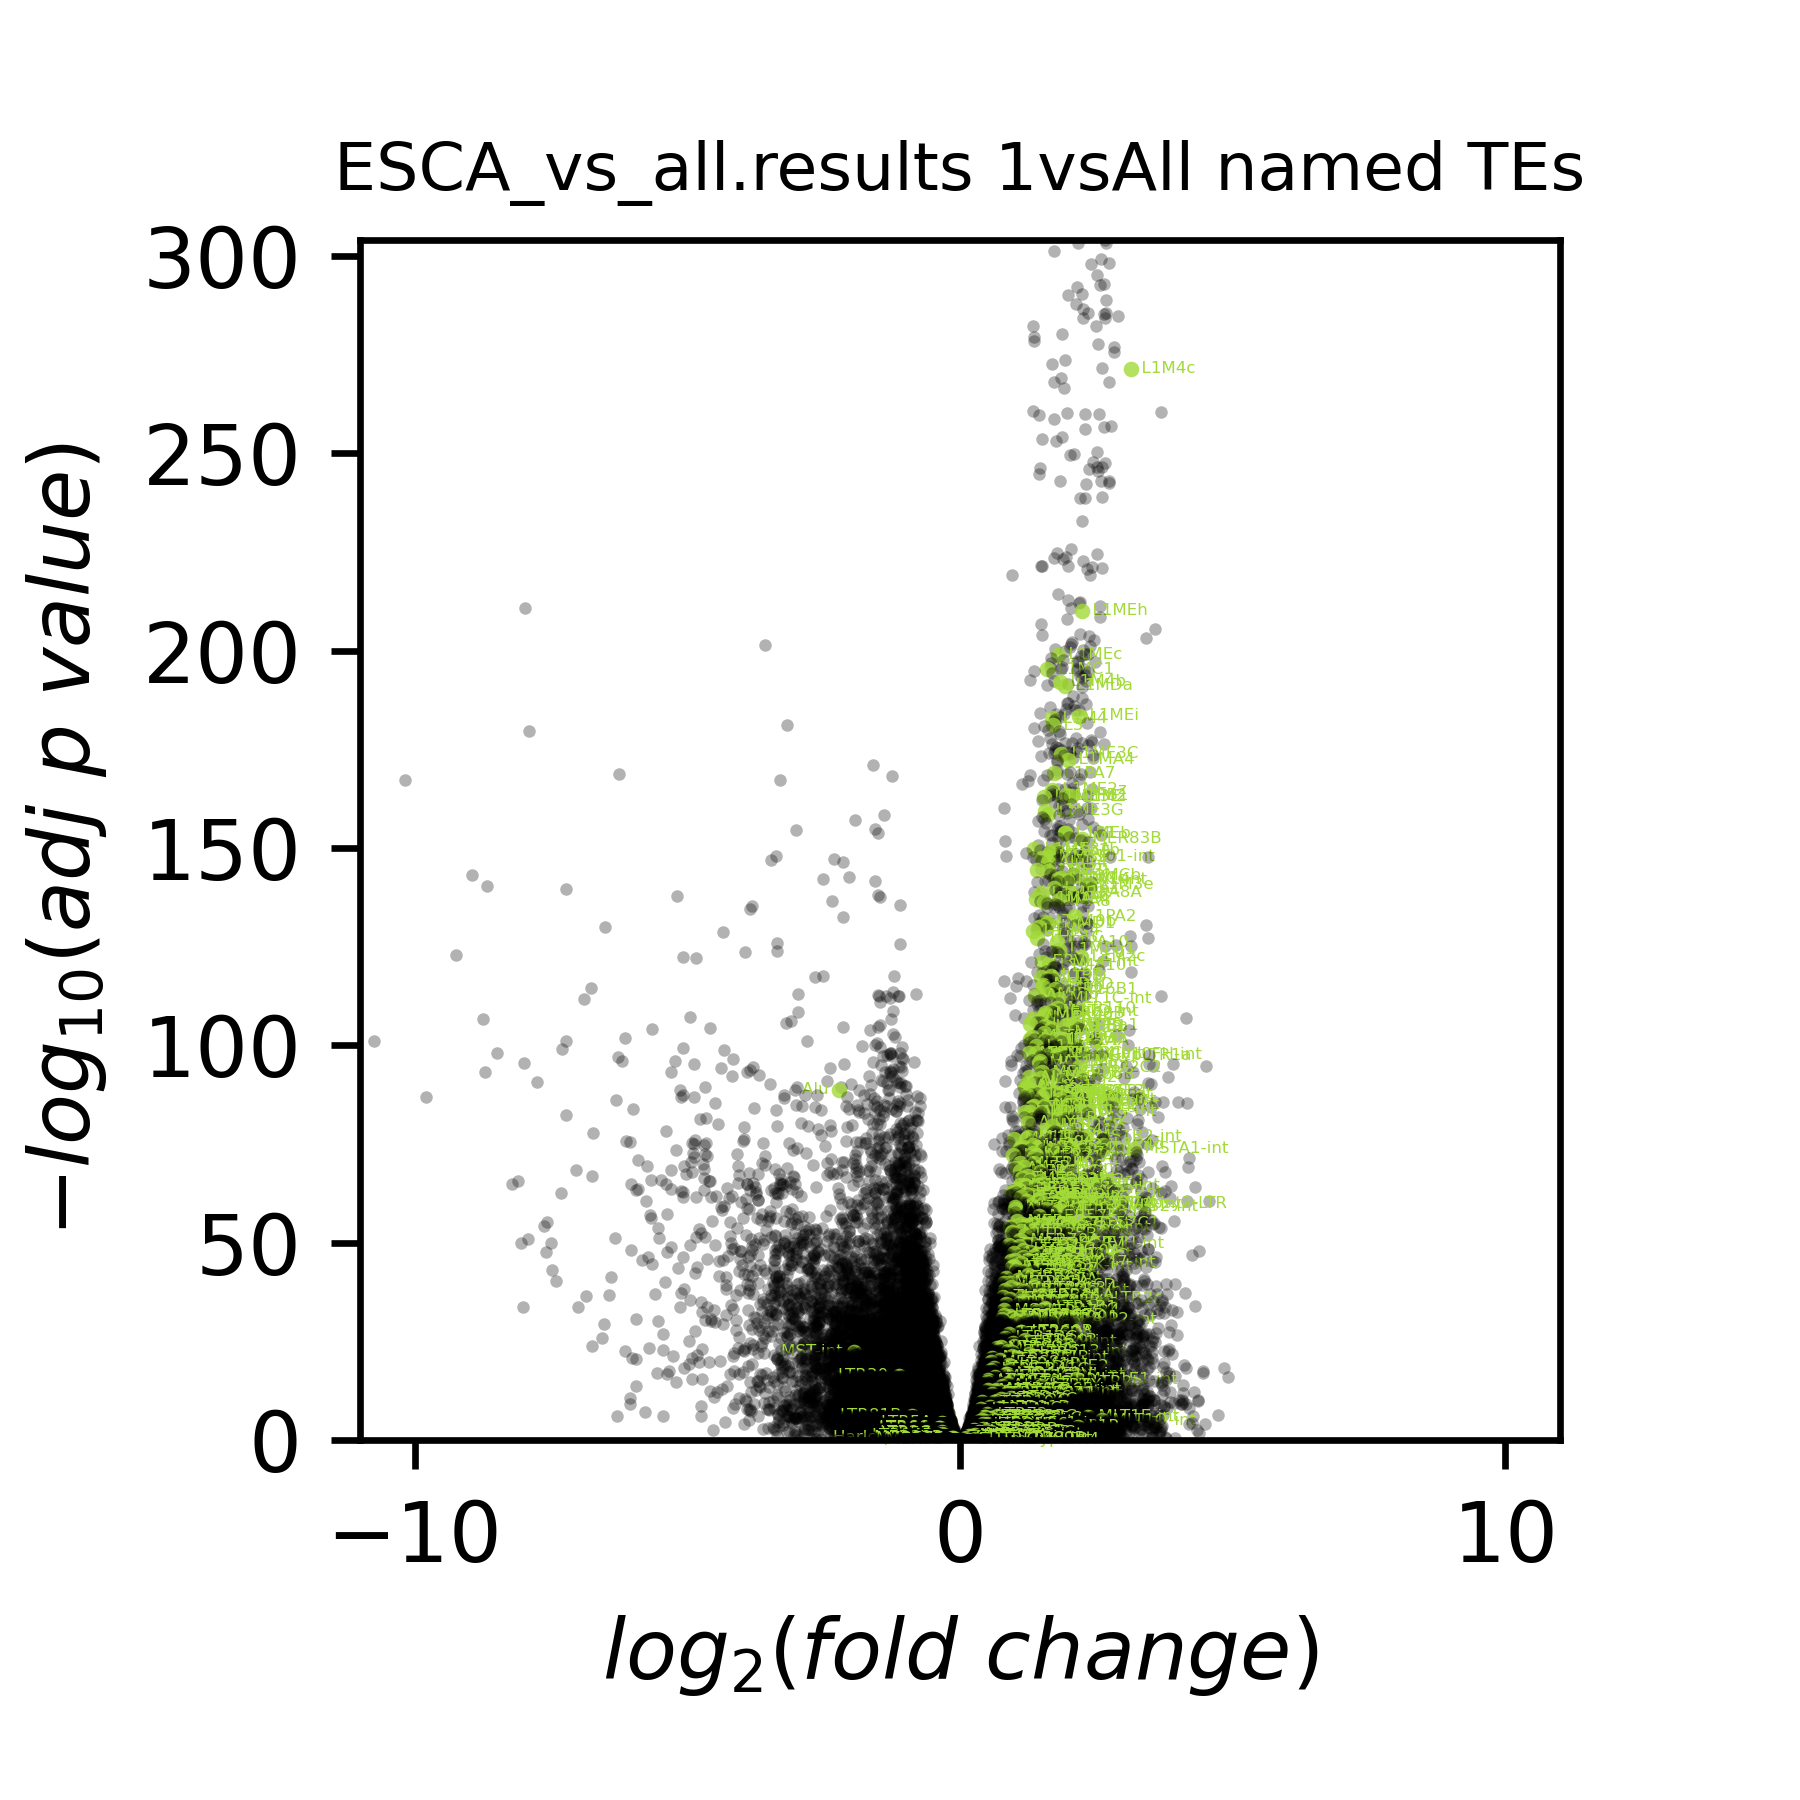

In [9]:
%%time
def plotTEsWitNames(
    repeatDF : pd.DataFrame
    ):
    plotTitle = "{} 1vsAll named TEs".format(deseqResultsFileName)
    imgFilePath = imgOut +"/" + urlify(plotTitle) + ".png" 
    print(f'aedwip {imgFilePath}')
    numHeaderLines = 8

    # # get names of TE's we want to color
    # TECladeSet = set( ['SINE', 'LINE', 'LTR'] )
    # selectTERows = repeatDF.loc[:, 'clade'].isin( TECladeSet )
    # print(f'len(selectTERows) : {len(selectTERows)} sum : {selectTERows.sum()} ')
    # TE_DF = repeatDF.loc[selectTERows, :]

    # # save namesto temp file
    # geneNamesPath = f'/scratch/aedavids/tmp/plotRepeatsGeneNames.txt'
    # saveList(geneNamesPath, TE_DF.index.values, isSingleItemLine=True )

    geneNamesPath = createTENames( repeatDF )

    # plot
    exitStatus = createVolcanoPlot(deseqResultsFilePath, 
                                   imgFilePath, 
                                   numHeaderLines, 
                                   plotTitle, 
                                   geneNamesPath=geneNamesPath,
                                  plotNames=True)
    
    
    return (exitStatus, imgFilePath)
    
      
################################################################################
# generate plot
exitStatus, imgFilePath = plotTEsWitNames(repeatDF)

# display
Image(imgFilePath) 

# Best 100

aedwip /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-best-100.png
arguments:
--inputFile /private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category/best100GTEx_TCGA/training/best100GTEx_TCGA.sh.out/GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-100/ESCA_vs_all.results \
                            --title 'ESCA_vs_all.results 1vsAll best 100' \
                            --output /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-best-100.png  \
                            --numHeaderLines 8 \
                             --geneNamesFile /scratch/aedavids/tmp/plotBest100WitNames.txt \
                            --label
exit status:['DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/plotBest100WitNames.txt', '############## AEDWIP plotNames:True']


best 100: select abs(lfc) >= 2.0 and padj <= 0.00

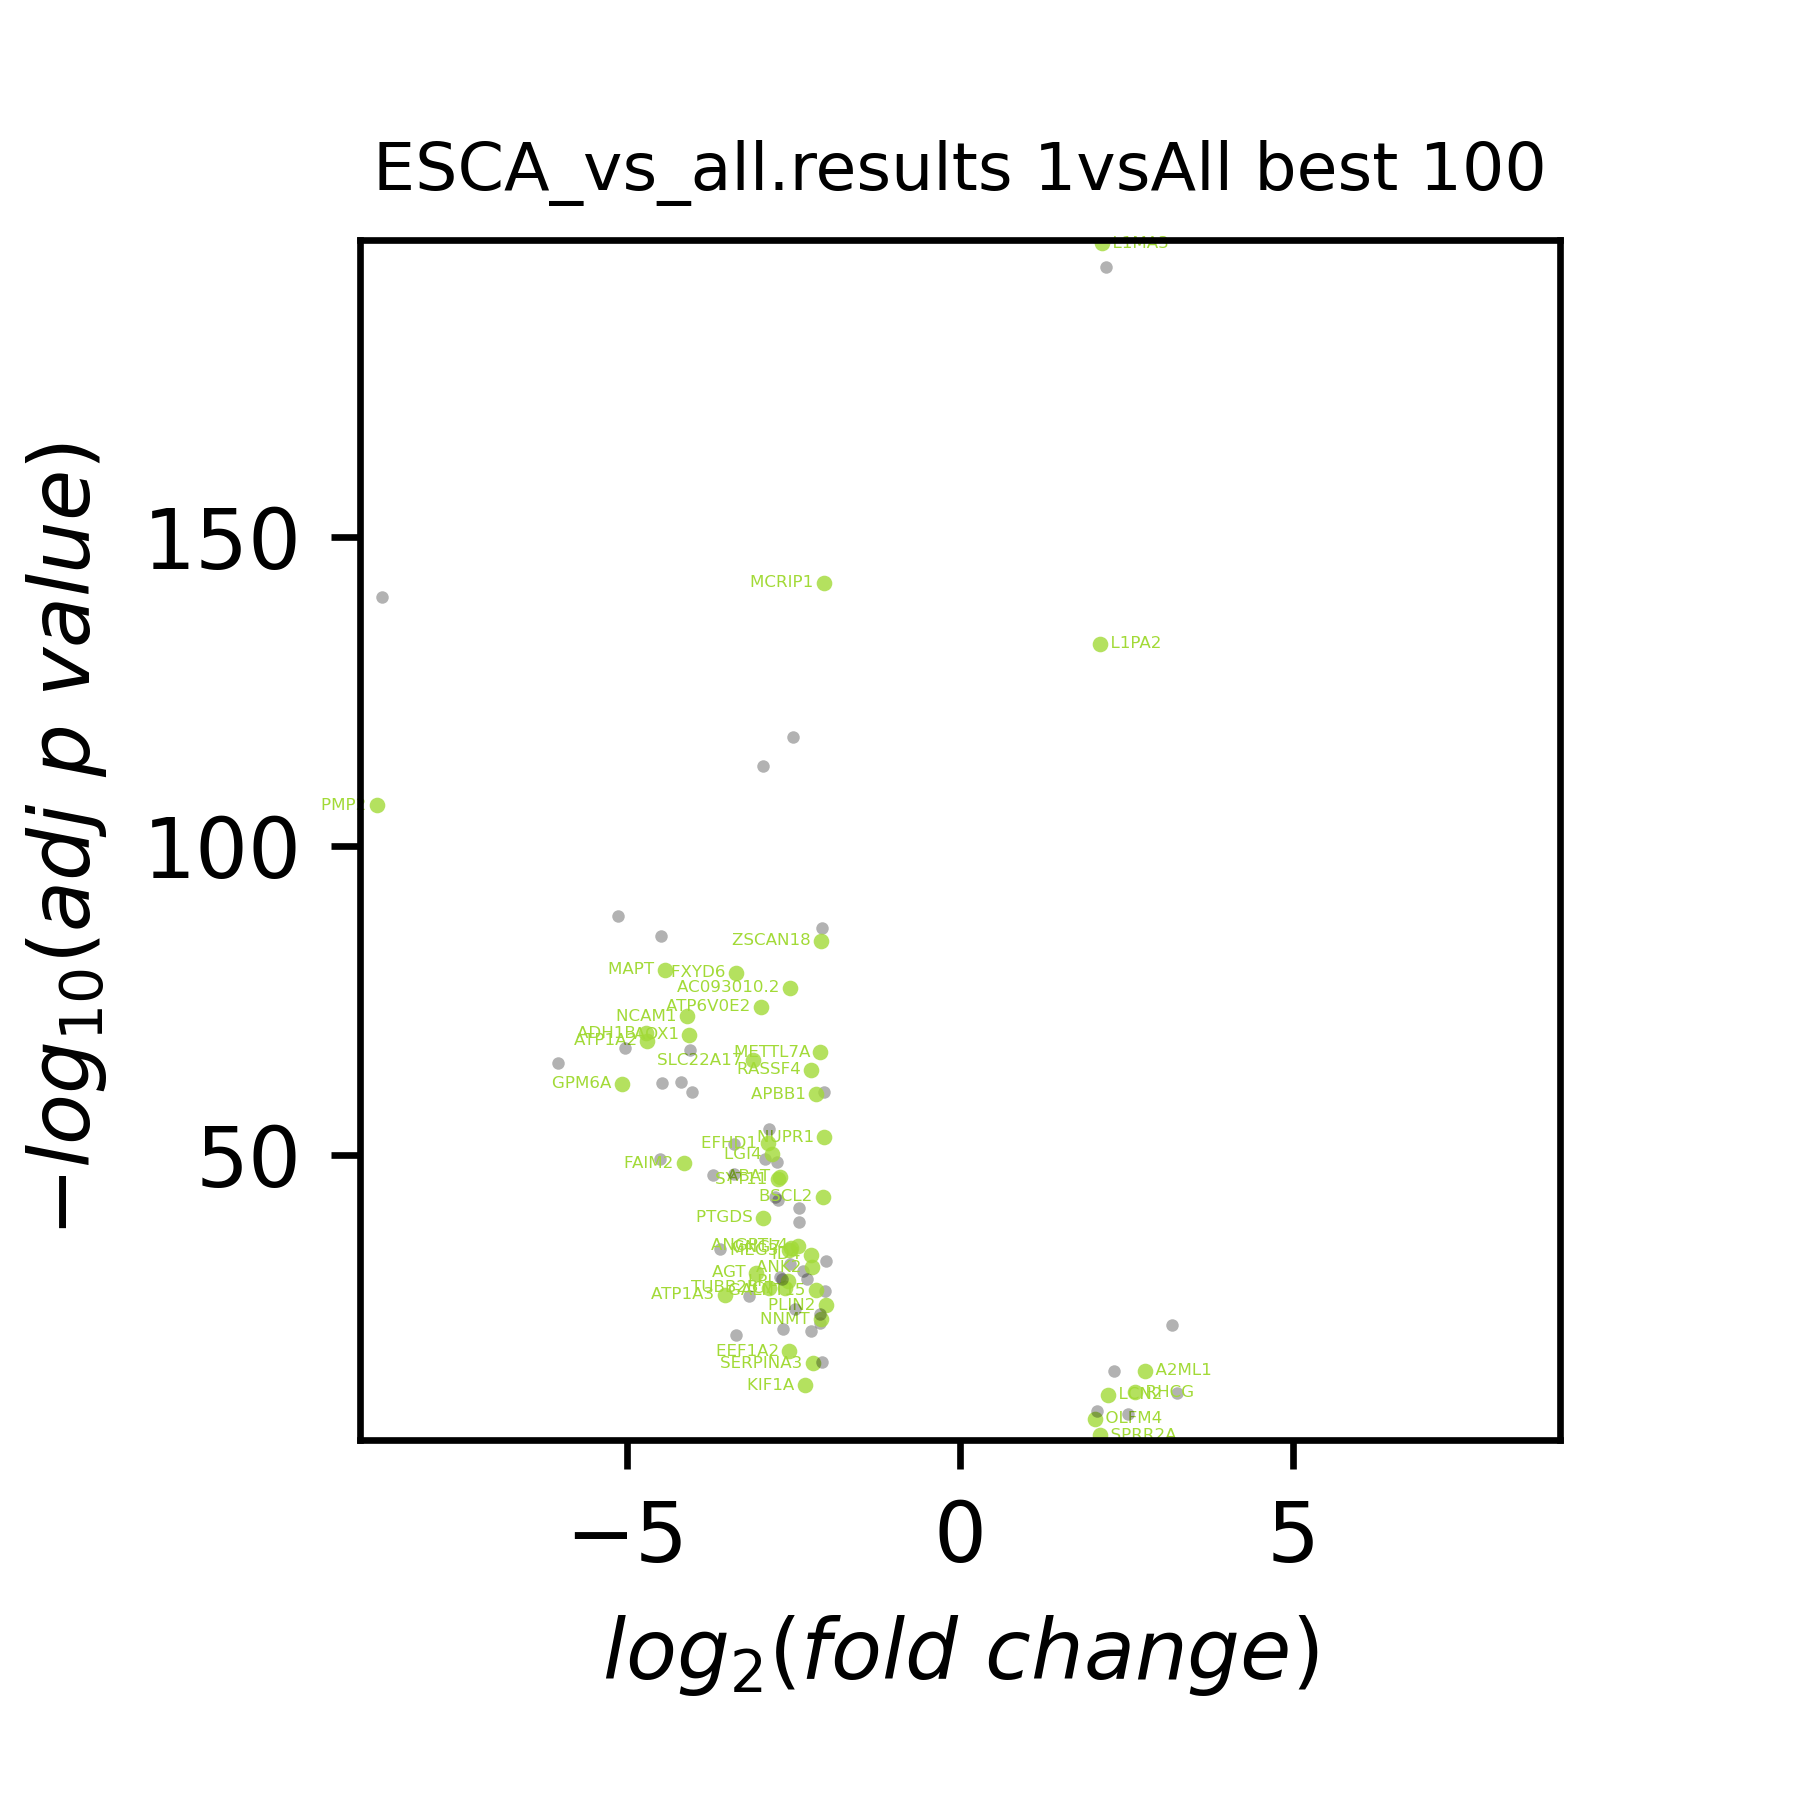

In [10]:
%%time
def plotBest100WitNames(
    repeatDF : pd.DataFrame
    ):
    plotTitle = "{} 1vsAll best 100".format(deseqResultsFileName)
    imgFilePath = imgOut +"/" + urlify(plotTitle) + ".png" 
    print(f'aedwip {imgFilePath}')
    numHeaderLines = 8

    hRunOut= "/private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category/best100GTEx_TCGA/training/best100GTEx_TCGA.sh.out/GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-100"
    deseqResultsFilePath = f'{hRunOut}/{deseqResultsFileName}'
   

    hRunOut= "/private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category/best100GTEx_TCGA/training/best100GTEx_TCGA.sh.out/GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-100"
    tPath = f'{hRunOut}/{deseqResultsFileName}'
    resultsDF = pd.read_csv(tPath, delimiter=',')

    geneNamesPath = f'/scratch/aedavids/tmp/plotBest100WitNames.txt'
    saveList(geneNamesPath, resultsDF.loc[:, 'name'].values, isSingleItemLine=True )
    
    # plot
    exitStatus = createVolcanoPlot(deseqResultsFilePath, 
                                   imgFilePath, 
                                   numHeaderLines, 
                                   plotTitle, 
                                   geneNamesPath=geneNamesPath,
                                  plotNames=True)
    
    
    return (exitStatus, imgFilePath)
    
      
################################################################################
# # generate plot
exitStatus, imgFilePath = plotBest100WitNames(repeatDF)

# display
print(f'\n\nbest 100: select abs(lfc) >= 2.0 and padj <= 0.001. sort in descending order by base mean. Take the top 100\n\n')
Image(imgFilePath) 

aedwip /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-best-100-no-names.png
arguments:
--inputFile /private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category/best100GTEx_TCGA/training/best100GTEx_TCGA.sh.out/GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-100/ESCA_vs_all.results \
                            --title 'ESCA_vs_all.results 1vsAll best 100 no names' \
                            --output /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-best-100-no-names.png  \
                            --numHeaderLines 8 \
                            --geneNamesFile /scratch/aedavids/tmp/plotBest100WitNames.txt
exit status:['DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/plotBest100WitNames.txt', '############## AEDWIP plotNames:False']


 "best 100: select abs(lfc) >= 2.0 and padj <= 0.001. sort i

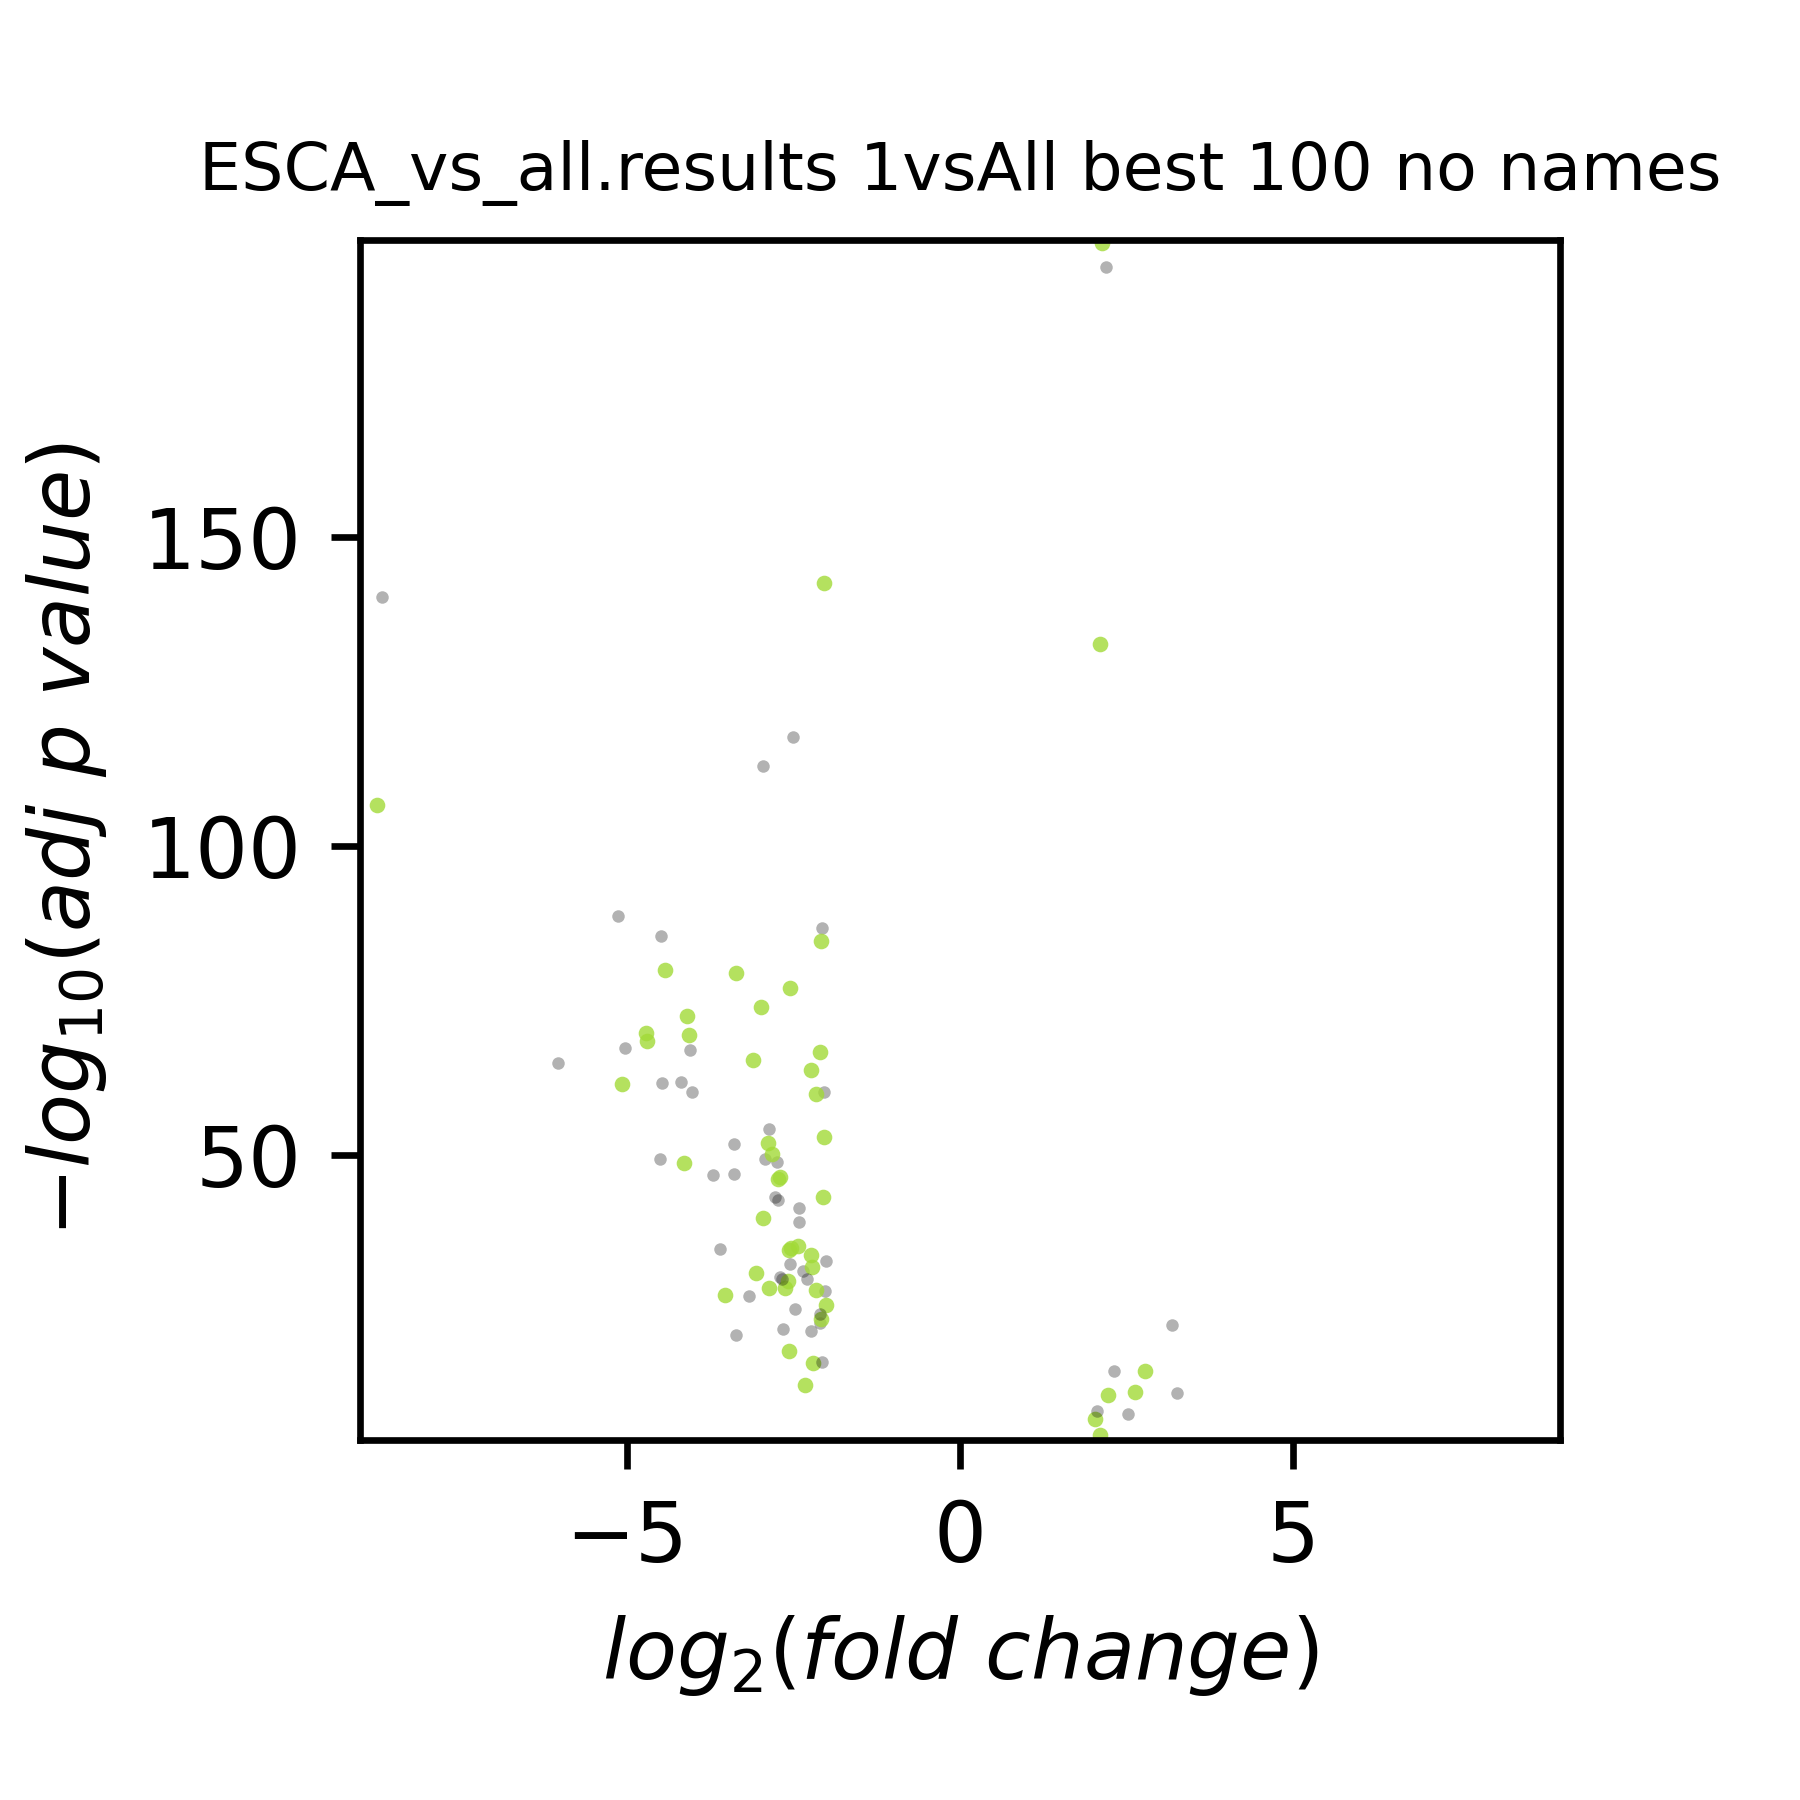

In [11]:
%%time
def plotBest100NoNames(
    repeatDF : pd.DataFrame
    ):
    plotTitle = "{} 1vsAll best 100 no names".format(deseqResultsFileName)
    imgFilePath = imgOut +"/" + urlify(plotTitle) + ".png" 
    print(f'aedwip {imgFilePath}')
    numHeaderLines = 8

    hRunOut= "/private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category/best100GTEx_TCGA/training/best100GTEx_TCGA.sh.out/GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-100"
    deseqResultsFilePath = f'{hRunOut}/{deseqResultsFileName}'
   

    hRunOut= "/private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category/best100GTEx_TCGA/training/best100GTEx_TCGA.sh.out/GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-100"
    tPath = f'{hRunOut}/{deseqResultsFileName}'
    resultsDF = pd.read_csv(tPath, delimiter=',')

    geneNamesPath = f'/scratch/aedavids/tmp/plotBest100WitNames.txt'
    saveList(geneNamesPath, resultsDF.loc[:, 'name'].values, isSingleItemLine=True )
    
    # plot
    exitStatus = createVolcanoPlot(deseqResultsFilePath, 
                                   imgFilePath, 
                                   numHeaderLines, 
                                   plotTitle, 
                                   geneNamesPath=geneNamesPath,
                                  plotNames=False)
    
    
    return (exitStatus, imgFilePath)
    
      
################################################################################
# # generate plot
exitStatus, imgFilePath = plotBest100NoNames(repeatDF)

# display
print(f'\n\n "best 100: select abs(lfc) >= 2.0 and padj <= 0.001. sort in descending order by base mean. Take the top 100\n\n')
Image(imgFilePath) 

In [12]:
# /private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category/best100GTEx_TCGA/training/
# best100GTEx_TCGA.sh.out/GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-100/ESCA_vs_all.results
bestESCA100DF = pd.read_csv("/private/groups/kimlab/aedavids/deconvolution/1vsAll-~gender_category/best100GTEx_TCGA/training/best100GTEx_TCGA.sh.out/GTEx_TCGA-design-tilda_gender_category-padj-0001-lfc-20-n-100/ESCA_vs_all.results")

# display all rows
pd.set_option('display.max_rows', None)
bestESCA100DF

,name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,CLU,56070.788880,-3.172978,0.177939,-17.831859,3.999023e-71,1.121550e-69
1,GPX3,40969.907575,-3.095799,0.194927,-15.881841,8.465630e-57,1.629792e-55
2,MALAT1,33662.063256,3.411390,0.111355,30.635216,4.159132e-206,7.230045e-204
3,FHL1,28068.059244,-2.172641,0.191624,-11.338056,8.501160e-30,7.125927e-29
4,APOE,22484.798309,-3.139022,0.208721,-15.039344,4.055480e-51,6.756236e-50
5,CRYAB,21594.014674,-3.967365,0.211431,-18.764330,1.478499e-78,4.892584e-77
6,NDRG2,17790.572037,-2.264813,0.169676,-13.347892,1.218489e-40,1.470862e-39
7,MEG3,17225.356894,-2.571760,0.203998,-12.606797,1.937067e-36,2.048389e-35
8,PEBP1,16044.090643,-2.064082,0.103122,-20.016020,3.993822e-89,1.625904e-87
9,ADH1B,15806.768045,-4.711338,0.262599,-17.941216,5.621158e-72,1.609354e-70
